In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd
from datetime import datetime as dt, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Connection Variable 
connection = engine.connect()

In [11]:
measure_df = pd.read_sql("SELECT * FROM measurement", connection)
measure_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [12]:
station_df = pd.read_sql("SELECT * FROM station", connection)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23')

In [20]:
# Converting date as string
year_ago = dt.strptime(recent_date[0], "%Y-%m-%d") # date to string
year_ago = year_ago - timedelta(days = 365) # subtracting date minus days in a year
year_ago = year_ago.strftime("%Y-%m-%d") # string to date
year_ago

'2016-08-23'

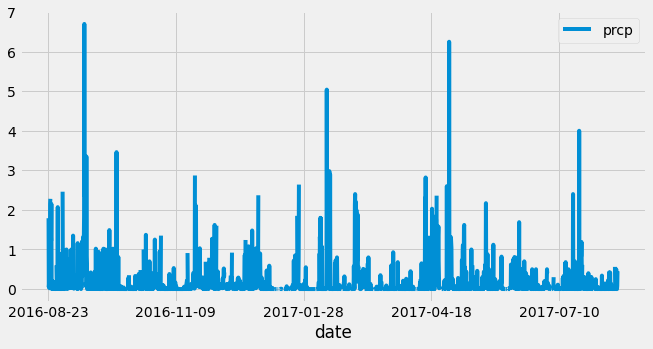

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.strptime(recent_date[0], "%Y-%m-%d") # date to string
year_ago = year_ago - timedelta(days = 365) # subtracting date minus days in a year
year_ago = year_ago.strftime("%Y-%m-%d") # string to date
# year_ago
# Perform a query to retrieve the date and precipitation scores
precip_year_ago = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()
# precip_year_ago
# Save the query results as a Pandas DataFrame and set the index to the date column
recent_rain = pd.DataFrame(precip_year_ago)
recent_rain.set_index("date", inplace = True)
#recent_rain.head()

# Sort the dataframe by date
recent_rain.sort_index(inplace = True)
#recent_rain.head()

# Use Pandas Plotting with Matplotlib to plot the data
recent_rain.plot(figsize = (10,5))

# add titles and make pretty


In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
recent_rain.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
station_numbers = session.query(station.station).count()
station_numbers

9

In [32]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc())
station_counts[0], station_counts[0][0]
# create a print statement to make this more readable

(('USC00519281', 2772), 'USC00519281')

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_data = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == station_counts[0][0])
active_data[0]
# add a print statement later

(54.0, 85.0, 71.66378066378067)

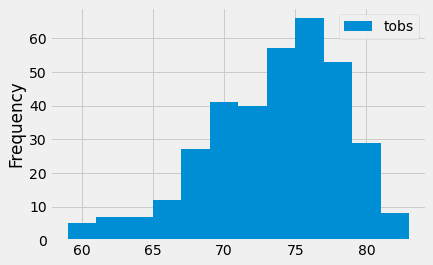

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_data = session.query(measurement.tobs, measurement.date).\
filter(measurement.station == station_counts[0][0]).filter(measurement.date >= year_ago)
active_df = pd.DataFrame(active_data)
active_df.plot(kind = "hist", bins = 12)
# add stuff later 

# Close session

In [ ]:
# Close Session
session.close()